# 行うこと

- ライブラリーの読み込みとバージョンの確認
- データの読み込みと加工
- トレーニングデータとテストデータの分割
- 学習
- 結果の確認
- 重要度解析
- 外れ値の検証
- 検討する項目

# ライブラリーの読み込みとバージョンの確認

In [1]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, PandasTools
print(rdBase.rdkitVersion)

2020.09.3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [3]:
df = PandasTools.LoadSDF('data/data_set.sdf')

RDKit ERROR: [09:30:19] 
[09:30:19] 

****
Pre-condition Violation
bond already exists
Violation occurred on line 399 in file /Users/runner/miniforge3/conda-bld/rdkit_1607861351157/work/Code/GraphMol/ROMol.cpp
Failed Expression: !(boost::edge(bond_pin->getBeginAtomIdx(), bond_pin->getEndAtomIdx(), d_graph) .second)
****

[09:30:19] Unexpected error hit on line 8255
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 399 in file /Users/runner/miniforge3/conda-bld/rdkit_1607861351157/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(bond_pin->getBeginAtomIdx(), bond_pin->getEndAtomIdx(), d_graph) .second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:30:19] Unexpected error hit on line 8255


In [4]:
df.dtypes

CAS_Number    object
logS          object
ID            object
ROMol         object
CA_Number     object
dtype: object

In [5]:
df["logS"] = df["logS"].astype(float)

,CAS_Number,logS,ID,ROMol,CA_Number
0,60-35-5,1.58,CC(N)=O,,NaN
1,NaN,1.34,CNN,,60-34-4
2,NaN,1.22,CC(O)=O,,64-19-7

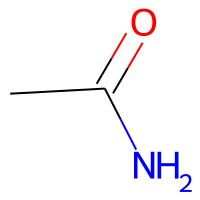
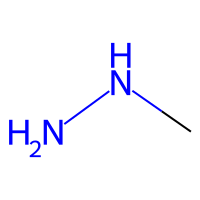
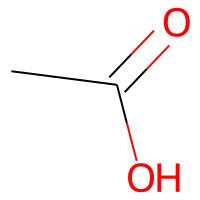

In [6]:
df.head(3)

In [7]:
df.dtypes

CAS_Number     object
logS          float64
ID             object
ROMol          object
CA_Number      object
dtype: object

# データの読み込みと加工 (finger printの作成)

In [8]:
import numpy as np

fingerprints = []
safe = []
for mol_idx, mol in enumerate(df["ROMol"]):
    try:
        fingerprint = [x for x in AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)]
        fingerprints.append(fingerprint)
        safe.append(mol_idx)
        
    except:
        print("Error", mol_idx)
        continue
fingerprints = np.array(fingerprints)
print(fingerprints.shape)
df_fp = pd.DataFrame(fingerprints)

(1289, 2048)


In [9]:
df_fp

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,CAS_Number,logS,ID,ROMol,CA_Number,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,60-35-5,1.58,CC(N)=O,,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1.34,CNN,,60-34-4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,1.22,CC(O)=O,,64-19-7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1.15,C1CCCN1,,123-75-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,1.12,NC([NH]O)=O,,127-07-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,NaN,-8.65,Clc1ccc(Cl)c(c1Cl)c2c(Cl)ccc(Cl)c2Cl,,38411-22-2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1286,NaN,-8.66,c12c(cccc3)c3ccc1cc4c(ccc5c4cccc5)c2,,53-70-3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1287,NaN,-9.03,c1(c(cc6)ccc3ccc4ccc5)c3c4c5c2c1c6ccc2,,191-24-2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288,NaN,-10.26,Clc1c(c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c(Cl)c1Cl,,40186-72-9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

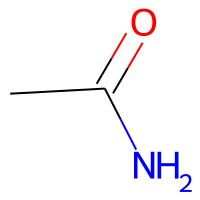
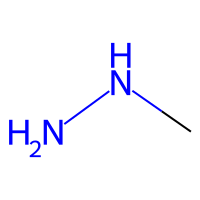
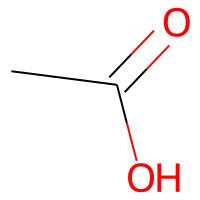
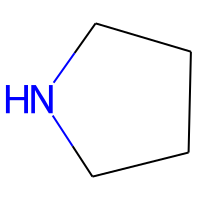
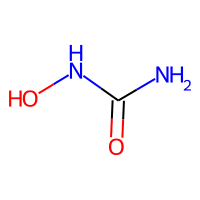
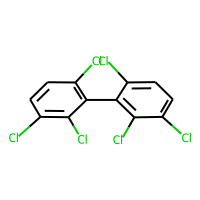
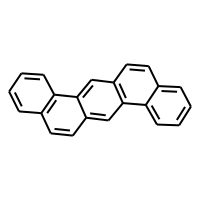
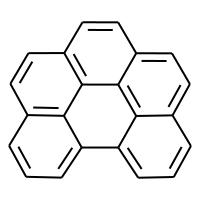
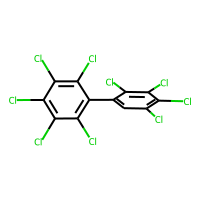
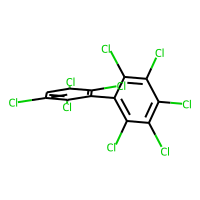

In [10]:
df_comb = df.join(df_fp)
df_comb 

# トレーニングデータとテストデータの分割

In [11]:
X = df_fp

In [12]:
y = df['logS']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
X_train = X_train.sort_index()
X_train

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_test = X_test.sort_index()
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y_train = y_train.sort_index()
y_train

0        1.58
1        1.34
2        1.22
3        1.15
4        1.12
        ...  
1284    -8.60
1285    -8.65
1286    -8.66
1287    -9.03
1288   -10.26
Name: logS, Length: 1160, dtype: float64

In [16]:
y_test = y_test.sort_index()
y_test

7        1.10
11       1.07
31       0.57
35       0.48
43       0.32
        ...  
1250    -5.46
1254    -5.80
1255    -5.89
1257    -6.02
1289   -10.41
Name: logS, Length: 129, dtype: float64

# 学習

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 7, n_estimators = 500, n_jobs = -1, random_state = 100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=500, n_jobs=-1,
                      random_state=100)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
score = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(score)
print(f'rmse: {rmse:.4f}')
score2 = r2_score(y_test, y_pred)
print("R2", score2)
y_predtrain = model.predict(X_train)

rmse: 1.1369
R2 0.7111981352639316


In [19]:
y_predtrain = y_predtrain.reshape(-1, 1)
y_predtrain = pd.DataFrame(y_predtrain)
y_predtrain

,0
0,-0.735851
1,-1.354848
2,-0.794389
3,-1.144575
4,-0.707618
...,...
1155,-6.379292
1156,-6.903315
1157,-6.658560
1158,-8.290609


# 結果の確認

In [20]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(model, X_train, y_train, scoring ='neg_mean_squared_error', cv = 10)

In [21]:
cross_validation = cross_validation * -1
cross_validation

array([4.66565717, 1.53081505, 0.6947451 , 0.86970653, 1.26086043,
       2.49246824, 5.90063783, 1.39132141, 0.61638842, 3.43596365])

In [22]:
rmse = np.mean(np.sqrt(cross_validation))
print('RMSE_CV')
print(rmse)

RMSE_CV
1.4112409392758365


In [23]:
"""from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 200, 500, 1000]}]
grid_search = GridSearchCV(estimator = random_forest, 
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = len(y_train), 
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_score = np.sqrt(-1 * grid_search.best_score_)
best_parameters = grid_search.best_params_
print("Best Score: {:.2f}".format(best_score.mean()))
print("Best Parameters:", best_parameters)
best_rf = grid_search.best_estimator_"""

'from sklearn.model_selection import GridSearchCV\nparameters = [{\'n_estimators\': [100, 200, 500, 1000]}]\ngrid_search = GridSearchCV(estimator = random_forest, \n                           param_grid = parameters,\n                           scoring = \'neg_mean_squared_error\',\n                           cv = len(y_train), \n                           n_jobs = -1)\ngrid_search.fit(X_train, y_train)\nbest_score = np.sqrt(-1 * grid_search.best_score_)\nbest_parameters = grid_search.best_params_\nprint("Best Score: {:.2f}".format(best_score.mean()))\nprint("Best Parameters:", best_parameters)\nbest_rf = grid_search.best_estimator_'

In [24]:
y_test

7        1.10
11       1.07
31       0.57
35       0.48
43       0.32
        ...  
1250    -5.46
1254    -5.80
1255    -5.89
1257    -6.02
1289   -10.41
Name: logS, Length: 129, dtype: float64

In [25]:
y_pred = pd.Series(y_pred)
y_test.reset_index(inplace=True, drop=True)
rf_plot = pd.concat([y_test, y_pred], axis = 1)
rf_plot.columns = ['y_test', 'y_pred']
rf_plot

,y_test,y_pred
0,1.10,-1.674673
1,1.07,-1.148561
2,0.57,-1.366123
3,0.48,-1.454840
4,0.32,-1.359122
...,...,...
124,-5.46,-3.850750
125,-5.80,-4.416600
126,-5.89,-4.830918
127,-6.02,-5.866926


In [26]:
y_train.reset_index(inplace=True, drop=True)
rf_plot2 = pd.concat([y_train, y_predtrain], axis = 1)
rf_plot2.columns = ['y_train', 'pred']
rf_plot2

,y_train,pred
0,1.58,-0.735851
1,1.34,-1.354848
2,1.22,-0.794389
3,1.15,-1.144575
4,1.12,-0.707618
...,...,...
1155,-8.60,-6.379292
1156,-8.65,-6.903315
1157,-8.66,-6.658560
1158,-9.03,-8.290609


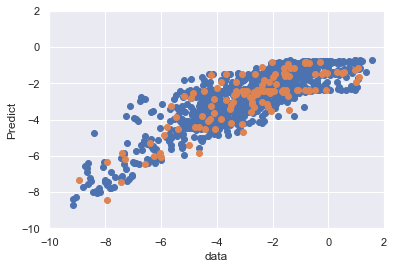

In [27]:
plt.figure()

x1 = rf_plot2.y_train.astype(float)
y1 = rf_plot2.pred.astype(float)

plt.scatter(x1, y1)

plt.xlim(-10, 2)
plt.ylim(-10, 2)

plt.xlabel('data')
plt.ylabel('Predict')

x2 = rf_plot.y_test.astype(float)
y2 = rf_plot.y_pred.astype(float)

plt.scatter(x2, y2)

plt.show()

# 重要度解析

,feature,feature_importance
561,561,2.209095e-01
1087,1087,9.384551e-02
1380,1380,5.339084e-02
807,807,5.108455e-02
1143,1143,4.912735e-02
...,...,...
102,102,1.493355e-09
1494,1494,3.690150e-10
1860,1860,5.034174e-11
1090,1090,4.067950e-11


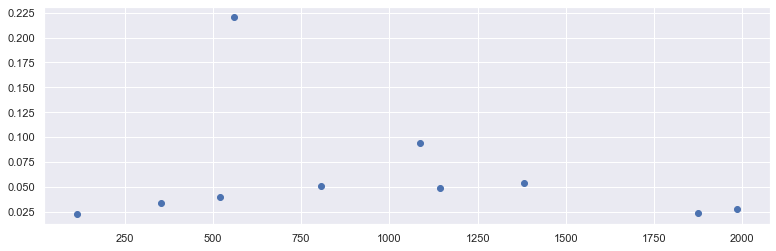

In [28]:
plt.rcParams["figure.figsize"] = [13,4]
fi_rf = model.feature_importances_  
features_rf = pd.DataFrame({'feature': list(X_train.columns),
                            'feature_importance': fi_rf[:]}).sort_values('feature_importance', ascending = False)
features_rf = features_rf[features_rf['feature_importance'] != 0]
plt.scatter(features_rf.iloc[:10, :].feature, features_rf.iloc[:10, :].feature_importance);
features_rf

## 重要だったfingerprintの確認

In [29]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import DrawMorganBits, IPythonConsole
help(Draw.DrawMorganBits)          
                   

Help on function DrawMorganBits in module rdkit.Chem.Draw.IPythonConsole:

DrawMorganBits(*args, drawOptions=<rdkit.Chem.Draw.rdMolDraw2D.MolDrawOptions object at 0x7f9060e5e590>, **kwargs)



,CAS_Number,logS,ID,ROMol,CA_Number,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,60-35-5,1.58,CC(N)=O,,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1.34,CNN,,60-34-4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,1.22,CC(O)=O,,64-19-7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1.15,C1CCCN1,,123-75-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,1.12,NC([NH]O)=O,,127-07-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,NaN,-8.65,Clc1ccc(Cl)c(c1Cl)c2c(Cl)ccc(Cl)c2Cl,,38411-22-2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1286,NaN,-8.66,c12c(cccc3)c3ccc1cc4c(ccc5c4cccc5)c2,,53-70-3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1287,NaN,-9.03,c1(c(cc6)ccc3ccc4ccc5)c3c4c5c2c1c6ccc2,,191-24-2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288,NaN,-10.26,Clc1c(c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c(Cl)c1Cl,,40186-72-9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

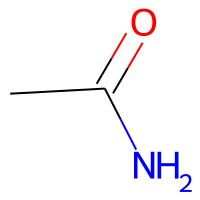
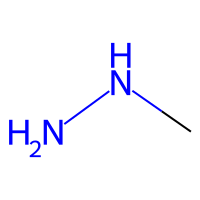
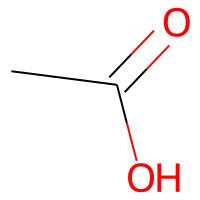
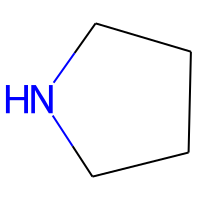
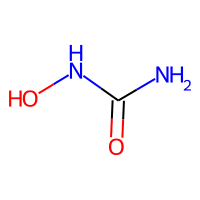
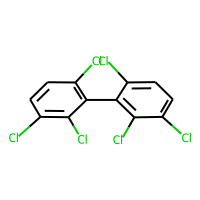
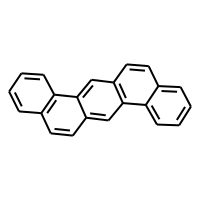
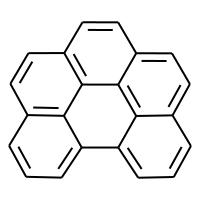
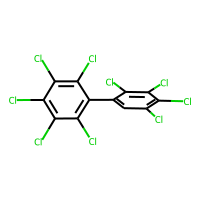
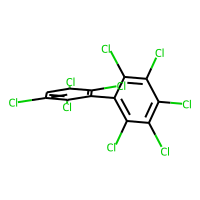

In [30]:
df_comb = df.join(df_fp)
df_comb 

# 外れ値の検証

,CAS_Number,logS,ID,ROMol,CA_Number,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,60-35-5,1.58,CC(N)=O,,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1.34,CNN,,60-34-4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,1.22,CC(O)=O,,64-19-7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1.15,C1CCCN1,,123-75-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,1.12,NC([NH]O)=O,,127-07-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,NaN,-8.65,Clc1ccc(Cl)c(c1Cl)c2c(Cl)ccc(Cl)c2Cl,,38411-22-2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1286,NaN,-8.66,c12c(cccc3)c3ccc1cc4c(ccc5c4cccc5)c2,,53-70-3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1287,NaN,-9.03,c1(c(cc6)ccc3ccc4ccc5)c3c4c5c2c1c6ccc2,,191-24-2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288,NaN,-10.26,Clc1c(c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c(Cl)c1Cl,,40186-72-9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

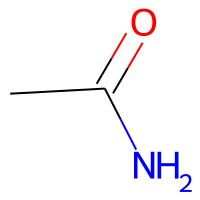
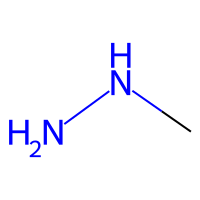
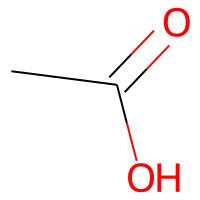
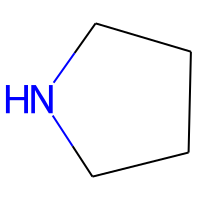
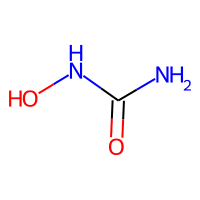
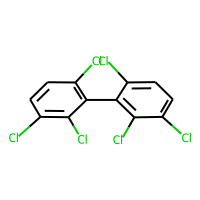
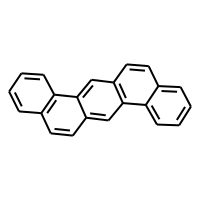
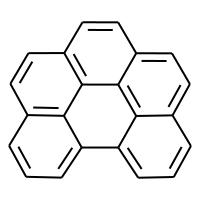
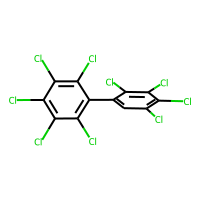
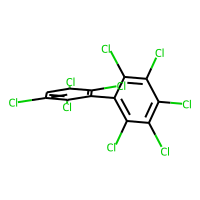

In [31]:
df_comb 

# 学習結果から考えることや検討項目など

1. 化合物の表現方法として、フィンガープリント以外にもさまざまな「化学構造記述子」がある。

2. 機械学習手法として、ランダムフォレスト以外にも色々な手法がある。

3. パラメータ調節方法として、グリッドサーチやベイズ最適化などの方法がある。

4. 機械学習で注意すべき点として「過学習」という現象があり、それを防ぐための方法論として「交差検定」などがある。
